### MLP 순방향 패스

In [1]:
import numpy as np

In [2]:
# 시그모이드 함수
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# 시그모이드 1차 도함수 => 순방향 패스에서는 필요없음 
#def actf_deriv(x):
#    return sigmoid(x)*(1-sigmoid(x))

# 각 층의 노드(유닛)
inputs, hiddens, outputs = 2, 2, 1

# 학습률 => 순방향 패스에서는 필요없음
learning_rate = 0.2 

# 훈련 세트(샘플과 정답) => XOR 문제 
X = np.array([[0,0], 
              [0,1], 
              [1,0], 
              [1,1]])

T = np.array([[0],[1],[1],[0]])


In [3]:
# 가중치와 바이어스
W1 = np.array([[0.10, 0.20],
               [0.30, 0.40]])

B1 = np.array([0.1, 0.2])

W2 = np.array([[0.50], 
               [0.60]])

B2 = np.array([0.3])


In [4]:
# 순방향 전파 계산
def predict(x):
    layer0 = x  # 입력층(0층)
    Z1 = np.dot(layer0, W1) + B1  # 행렬곱 계산 
    
    layer1 = sigmoid(Z1)  # 활성화함수 적용 
    Z2 = np.dot(layer1, W2) + B2
    
    layer2 = sigmoid(Z2)
    return layer0, layer1, layer2


In [5]:
def test():
    for x,y in zip(X, T):
        x = np.reshape(x, (1, -1))
        layer0, layer1, layer2 = predict(x)
        print(x, y, layer2)
test()
        

[[0 0]] [0] [[0.70938314]]
[[0 1]] [1] [[0.72844306]]
[[1 0]] [1] [[0.71791234]]
[[1 1]] [0] [[0.73598705]]


### 손실함수

In [6]:
def MSE(target, y):
    return 0.5*np.sum((y-target)**2)

y = np.array([0,0,0.8,0.1,0,0,0,0.1,0,0])
target = np.array([0,0,1,0,0,0,0,0,0,0])

MSE(target, y)

0.029999999999999992

### 경사하강법

In [7]:
x = 10
learning_rate = 0.2
precision = 0.00001
max_iterations = 100

# 손실함수(람다식으로 정의)
loss_func = lambda x:(x-3)**2+10

# 그래디언트(손실함수의 1차 미분식)
gradient = lambda x: 2*x-6

# 경사하강법
for i in range(max_iterations):
    x = x - learning_rate*gradient(x)
    print(f'손실함수값({x}) = {loss_func(x)}')

print(f'최소값 : {x}')


손실함수값(7.199999999999999) = 27.639999999999993
손실함수값(5.52) = 16.350399999999997
손실함수값(4.512) = 12.286143999999998
손실함수값(3.9071999999999996) = 10.82301184
손실함수값(3.54432) = 10.2962842624
손실함수값(3.3265919999999998) = 10.106662334464
손실함수값(3.1959551999999998) = 10.03839844040704
손실함수값(3.11757312) = 10.013823438546535
손실함수값(3.070543872) = 10.004976437876753
손실함수값(3.0423263232) = 10.001791517635631
손실함수값(3.02539579392) = 10.000644946348826
손실함수값(3.015237476352) = 10.000232180685577
손실함수값(3.0091424858112) = 10.000083585046807
손실함수값(3.00548549148672) = 10.000030090616852
손실함수값(3.003291294892032) = 10.000010832622067
손실함수값(3.0019747769352194) = 10.000003899743945
손실함수값(3.0011848661611316) = 10.00000140390782
손실함수값(3.000710919696679) = 10.000000505406815
손실함수값(3.0004265518180073) = 10.000000181946453
손실함수값(3.0002559310908046) = 10.000000065500723
손실함수값(3.0001535586544827) = 10.00000002358026
손실함수값(3.0000921351926895) = 10.000000008488893
손실함수값(3.0000552811156136) = 10.000000003056002
손실함수값(3.00003

#### 3차원 그래프 시각화 (2차원 그래디언트) 

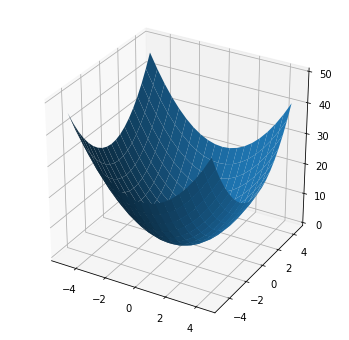

In [10]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

x = np.arange(-5, 5, 0.5)
y = np.arange(-5, 5, 0.5)
X, Y = np.meshgrid(x, y)
Z = X**2 + Y**2

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z)
plt.show()

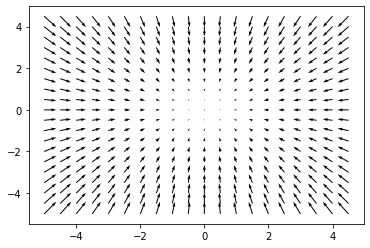

In [11]:
U = -2*X  # 가로 방향 그래디언트 
V = -2*Y  # 세로 방향 그래디언트

# 화살표의 길이는 그래디언트 크기, 방향은 방향 
plt.figure()
Q = plt.quiver(X, Y, U, V, units='width')  # 화살표 시각화
plt.show()